# Attendance Demo with PixieDust

This notebook shows how to:
1. use the Weather Company Data joined with attendance data
2. convert this csv data into a [pandas](http://pandas.pydata.org/pandas-docs/stable/) DataFrame
4. create a weather chart and map with [matplotlib](http://matplotlib.org/)
3. create a weather chart and map with [PixieDust](https://ibm-cds-labs.github.io/pixiedust/index.html)

Before running the notebook:
* Sign up for a free 30-day trial [Bluemix account](https://console.ng.bluemix.net/)
* Run this notebook locally or in the Cloud using the [IBM Data Science Experience](https://datascience.ibm.com/)

## 1. Load packages

First, uncomment the lines in the below cell and upgrade the pixiedust and bokeh packages. When this is done restart the kernel. You have to do this only once, or when there is an update available.

Then import the package needed to run this notebook.

In [15]:
import requests
import json
import pandas as pd
import numpy as np
from datetime import datetime
import time
import pixiedust

## 2. Get the data set

This takes the data set and loads it into a pandas data frame wait a few seconds for it to run.

In [21]:
# The code was removed by DSX for sharing.

,AttendanceEventId,Forename,Surname,PostTown,Postcode,HomeLat,HomeLong,County,Region,SessionDate,...,ApparentTemperatureCelsius,WindSpeedKph,WindDirectionDegrees,PrecipitationPreviousHourCentimeters,HeatIndexCelsius,SnowfallCentimeters,SurfaceWindGustsKph,AttendanceStartTime,AttendanceEndTime,EventCost
0,3986,Virgil,Tracy,Southampton,SO1 3GM,50.9097,-1.4044,Hampshire,South,2015-01-05,...,18.9,16.6,157,0.00000,18.9,0,34.6,2015-08-02 14:00,2015-08-02 15:00,3.24
1,9268,Barney,Dog,Wokingham,RG40 2JU,51.4105,-0.8339,Berkshire,South,2015-01-01,...,20.7,22.3,40,0.00000,20.7,0,51.0,2015-08-13 12:00,2015-08-13 13:00,4.79
2,8196,Iam,Ordinary,Hull,HU14 2FS,53.7457,-0.3367,East Yorkshire,North,2015-01-02,...,6.5,4.3,326,0.00000,6.5,0,27.0,2015-04-06 09:00,2015-04-06 10:00,5.76
3,10792,Some,One,Taunton,TA3 6FF,51.0153,-3.1068,Somerset,West,2015-01-03,...,5.8,19.8,232,0.00254,8.8,0,67.9,2017-03-16 13:00,2017-03-16 14:00,7.03
4,10458,Iam,Ordinary,Hull,HU14 2FS,53.7457,-0.3367,East Yorkshire,North,2015-01-04,...,3.4,14.8,349,0.00254,6.3,0,31.4,2016-04-16 13:00,2016-04-16 14:00,4.25


## 3. Plot data with matplotlib

In [23]:
df = df_data_3.set_index('SessionDate',drop=False)
df = df.drop(['AttendanceEventId','Forename','Surname','Postcode','SurfaceWetBulbTemperatureCelsius'],1)   
df = df.drop(['County','Region','EventCost','AttendanceEndTime','SurfaceDewpointTemperatureCelsius'],1)
df = df.drop(['SessionStartTime','SessionEndTime','NumberofBeds','Numberofconsultants','VenueCounty','VenueRegion'],1)
df = df.drop(['NumberofNurses','SurfaceWindGustsKph','HeatIndexCelsius','VenueName','VenueDesc','VenuePostcode'],1)
df = df.drop(['NumberAttended.1'],1)
df.head()

,PostTown,HomeLat,HomeLong,SessionDate,NumberInvited,NumberAttended,NumberofDonations,TotalBloodCollected,VenuePostTown,VenueLong,...,RelativeHumidityPercent,SurfaceAirPressureKilopascals,CloudCoveragePercent,WindChillTemperatureCelsius,ApparentTemperatureCelsius,WindSpeedKph,WindDirectionDegrees,PrecipitationPreviousHourCentimeters,SnowfallCentimeters,AttendanceStartTime
SessionDate,,,,,,,,,,,,,,,,,,,,,
2015-01-05,Southampton,50.9097,-1.4044,2015-01-05,82,67,49,28,Coventry,-1.5197,...,61,99.4,72,18.9,18.9,16.6,157,0.000,0,2015-08-02 14:00
2015-05-30,Enfield,51.6623,-0.1181,2015-05-30,25,12,5,3,Coventry,-1.5197,...,97,97.3,100,10.1,10.1,15.7,320,0.023,0,2017-06-29 09:00
2015-06-16,Thetford,52.4129,0.7517,2015-06-16,50,23,14,8,Coventry,-1.5197,...,78,99.3,75,-7.0,-7.0,26.6,141,0.000,0,2017-01-26 13:00
2015-01-02,Hull,53.7457,-0.3367,2015-01-02,50,23,14,8,Coventry,-1.5197,...,91,100.9,10,6.5,6.5,4.3,326,0.000,0,2015-04-06 09:00
2016-01-16,Wolverhampton,52.5871,-2.1289,2016-01-16,35,20,11,6,Coventry,-1.5197,...,91,100.9,10,6.5,6.5,4.3,326,0.000,0,2015-04-06 09:00


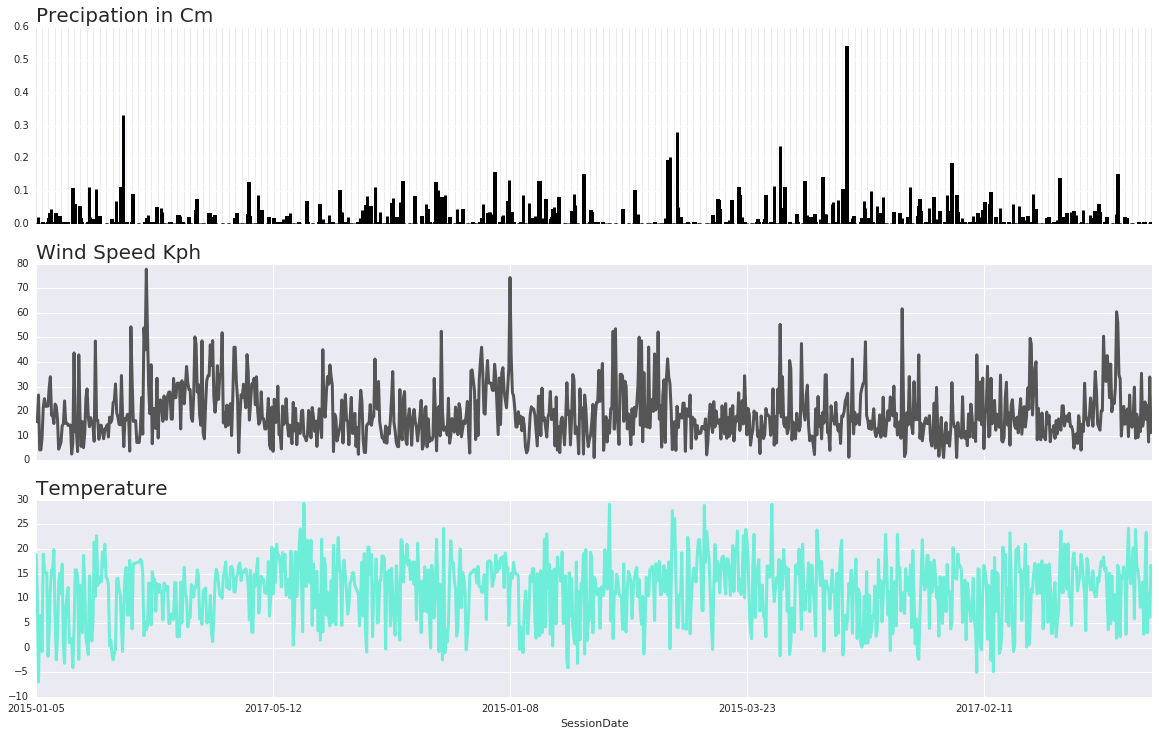

In [24]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 12))

df['ApparentTemperatureCelsius'].plot(ax=axes[2], color='#6EEDD8',lw=3.0,sharex=True)
axes[2].set_title('Temperature',loc='left',fontsize=20)

df['WindSpeedKph'].plot(ax=axes[1], color='#555556',lw=3.0,sharex=True)
axes[1].set_title('Wind Speed Kph',loc='left',fontsize=20)

df['PrecipitationPreviousHourCentimeters'].plot(ax=axes[0], kind='bar', color='#C93D79',lw=3.0,sharex=True)
axes[0].set_title('Precipation in Cm',loc='left',fontsize=20)

In [47]:
dfmap = pd.DataFrame(df)
dfmap = dfmap.drop(['NumberInvited','NumberAttended','NumberofDonations'],1) 
dfmap = dfmap.drop(['VenuePostTown', 'AttendanceStartTime','VenueLong','VenueLat'],1) 
del dfmap['SessionDate']
dfmap.head()

,PostTown,HomeLat,HomeLong,TotalBloodCollected,SurfaceTemperatureCelsius,RelativeHumidityPercent,SurfaceAirPressureKilopascals,CloudCoveragePercent,WindChillTemperatureCelsius,ApparentTemperatureCelsius,WindSpeedKph,WindDirectionDegrees,PrecipitationPreviousHourCentimeters,SnowfallCentimeters
SessionDate,,,,,,,,,,,,,,
2015-01-05,Southampton,50.9097,-1.4044,28,18.9,61,99.4,72,18.9,18.9,16.6,157,0.000,0
2015-05-30,Enfield,51.6623,-0.1181,3,10.1,97,97.3,100,10.1,10.1,15.7,320,0.023,0
2015-06-16,Thetford,52.4129,0.7517,8,-0.7,78,99.3,75,-7.0,-7.0,26.6,141,0.000,0
2015-01-02,Hull,53.7457,-0.3367,8,6.5,91,100.9,10,6.5,6.5,4.3,326,0.000,0
2016-01-16,Wolverhampton,52.5871,-2.1289,6,6.5,91,100.9,10,6.5,6.5,4.3,326,0.000,0


In [51]:
cities = pd.DataFrame(dfmap, index=None)
cities = cities.drop(['SurfaceTemperatureCelsius','RelativeHumidityPercent','SurfaceAirPressureKilopascals'],1)
cities = cities.drop(['CloudCoveragePercent','WindChillTemperatureCelsius','WindSpeedKph','WindDirectionDegrees'],1)
cities = cities.drop(['PrecipitationPreviousHourCentimeters','SnowfallCentimeters'],1)
cities = cities.reset_index()
cities.head()

,SessionDate,PostTown,HomeLat,HomeLong,TotalBloodCollected,ApparentTemperatureCelsius
0,2015-01-05,Southampton,50.9097,-1.4044,28,18.9
1,2015-05-30,Enfield,51.6623,-0.1181,3,10.1
2,2015-06-16,Thetford,52.4129,0.7517,8,-7.0
3,2015-01-02,Hull,53.7457,-0.3367,8,6.5
4,2016-01-16,Wolverhampton,52.5871,-2.1289,6,6.5


In [56]:
temps = pd.DataFrame(cities)
temps = temps.drop(['SessionDate','PostTown', 'HomeLat','HomeLong', 'TotalBloodCollected'],1)
temps.head()

,ApparentTemperatureCelsius
0,18.9
1,10.1
2,-7.0
3,6.5
4,6.5


In [54]:
icons = pd.DataFrame(cities)
icons = icons.drop(['SessionDate','PostTown', 'HomeLat','HomeLong', 'ApparentTemperatureCelsius'],1)
icons.head()

,TotalBloodCollected
0,28
1,3
2,8
3,8
4,6


## 5. Create a temperature map for the UK

TypeError: input must be an array, list, tuple or scalar

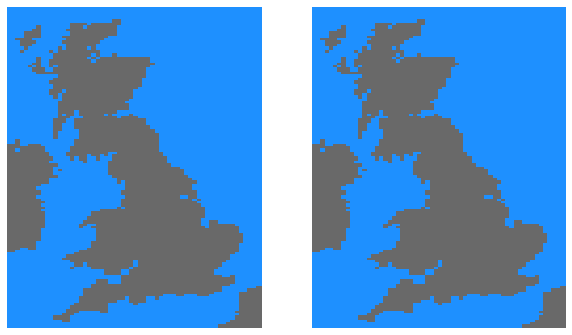

In [57]:
from mpl_toolkits.basemap import Basemap
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib._png import read_png
from itertools import izip
import urllib

matplotlib.style.use('bmh')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 12))

# background maps
m1 = Basemap(projection='mill',resolution=None,llcrnrlon=-7.5,llcrnrlat=49.84,urcrnrlon=2.5,urcrnrlat=59,ax=axes[0])
m1.drawlsmask(land_color='dimgrey',ocean_color='dodgerBlue',lakes=True)

m2 = Basemap(projection='mill',resolution=None,llcrnrlon=-7.5,llcrnrlat=49.84,urcrnrlon=2.5,urcrnrlat=59,ax=axes[1])
m2.drawlsmask(land_color='dimgrey',ocean_color='dodgerBlue',lakes=True)

# weather icons map
for [icon,city] in izip(icons,cities):
    lat = city[1]
    lon = city[2]
    try:
        pngfile=urllib.urlopen('https://github.com/ibm-cds-labs/python-notebooks/blob/master/weathericons/icon'+str(int(icon))+'.png?raw=true')
        icon_hand = read_png(pngfile)
        imagebox = OffsetImage(icon_hand, zoom=.15)
        ab = AnnotationBbox(imagebox,m1(lon,lat),frameon=False) 
        axes[0].add_artist(ab)
    except:
        pass
        
# temperature map    
for [temp,city] in izip(temps,cities):
    lat = city[2]
    lon = city[3]
    print
    if temp>16: 
        col='indigo'
    elif temp>14:
        col='darkmagenta'
    elif temp>12:
        col='red'
    elif temp>10:
        col='tomato'
    elif temp>0:
        col='turquoise'
            
    x1, y1 = m2(lon,lat)
    bbox_props = dict(boxstyle="round,pad=0.3", fc=col, ec=col, lw=2)
    axes[1].text(x1, y1, temp, ha="center", va="center",
                size=11,bbox=bbox_props)
    
plt.tight_layout()  

## 6. Plot data with PixieDust

https://ibm-cds-labs.github.io/pixiedust/

In [20]:
display(df)

In [ ]:
#display(dfmap)